In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

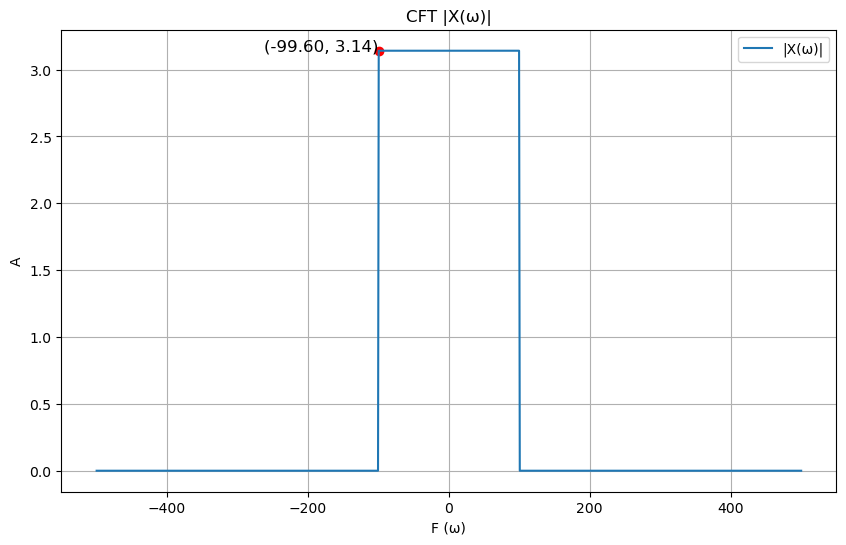

最大频率: -99.60
最大幅度: 3.14


In [5]:
# (1) - 1
# 常量Fh = 100HZ
Fh = 100

# 注册变量t
t = sp.symbols("t")

# 注册变量ω
w = sp.symbols("ω")

# 表达x(t)
x1 = sp.sin(2 * sp.pi * Fh * t) / t

# 做CFT运算
X1 = sp.fourier_transform(x1, t, w)

# 将傅里叶变换结果转换为可数值计算的函数
X1_func = sp.lambdify(w, X1, 'numpy')

# 生成频率范围
ω_vals = np.linspace(-500, 500, 1000)

# 计算傅里叶变换的数值结果
X_vals = X1_func(ω_vals)

# 找到峰值
peak_index = np.argmax(np.abs(X_vals))
peak_freq = ω_vals[peak_index]
peak_value = np.abs(X_vals[peak_index])

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(ω_vals, np.abs(X_vals), label='|X(ω)|')
plt.scatter([peak_freq], [peak_value], color='red')  # 标记峰值
plt.text(peak_freq, peak_value, f'({peak_freq:.2f}, {peak_value:.2f})', fontsize=12, ha='right')
plt.xlabel('F (ω)')
plt.ylabel('A')
plt.title('CFT |X(ω)|')
plt.legend()
plt.grid(True)
plt.show()

# 打印峰值信息
print(f'最大频率: {peak_freq:.2f}')
print(f'最大幅度: {peak_value:.2f}')

## (1)-1
1.  带宽受限
2.  有最高频率Fh = 99.6Hz
3.  Fs = 99.6 * 2 = 199.2Hz

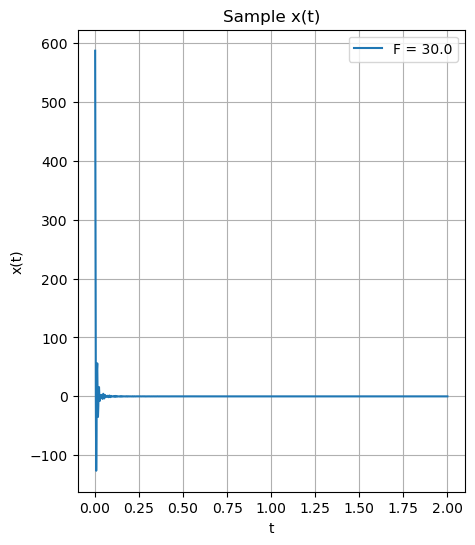

In [8]:
# (1) - 2
# 5个采样频率 0.3,0.6,1.2,1.8,2.4
F1, F2, F3, F4, F5 = 0.3 * Fh, 0.6 * Fh, 1.2 * Fh, 1.8 * Fh, 2.4 * Fh
x1_func = sp.lambdify(t, x1, "numpy")
# 进行时域采样,形成采样序列
t_vals = np.linspace(1e-3, 2, 1000)
x_vals = x1_func(t_vals)
# 采样序列生成
def  sample(t_vals, x_vals, F):
    return x_vals * np.sinc(F * t_vals)
# 绘图采样序列
def FigSample(F, t_vals, x_vals):
    x_sample = sample(t_vals, x_vals, F)
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, x_sample, label=f'F = {F}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('Sample x(t)')
    plt.legend()
    plt.grid(True)
    plt.show()
# 绘图
FigSample(F1, t_vals, x_vals)



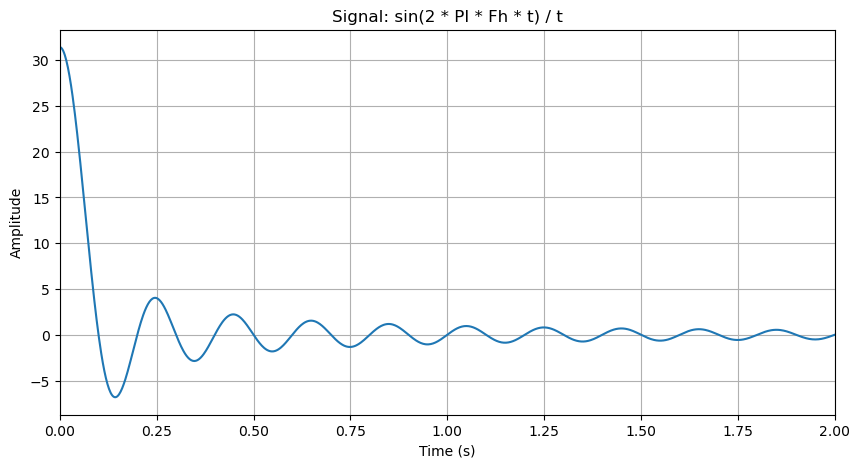

In [3]:
import numpy as np
import sympy as sp

# 定义符号
t = sp.symbols('t')
F_h = 5

# 创建符号表达式
expr = sp.sin(2 * sp.pi * F_h * t) / t

# 转换为 NumPy 函数
f_numpy = sp.lambdify(t, expr, 'numpy')

# 生成时间向量（避免 t=0）
time_vector = np.linspace(1e-3, 2, 1000)

# 计算 NumPy 数组
signal = f_numpy(time_vector)

# 图
plt.figure(figsize=(10, 5))
plt.plot(time_vector, signal)
plt.title('Signal: sin(2 * PI * Fh * t) / t')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, 2)
plt.show()



## (2) - 1
1. 带宽无限
2. 有明显衰减
3. 合适的取样频率为19.6Hz